<a href="https://colab.research.google.com/github/CintoJoseph/Streamlit/blob/main/cardamom_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import pandas as pd

dfs = []
for i in range(1, 458):  # Assuming you have 448 pages
    url = f'https://www.indianspices.com/indianspices/marketing/price/domestic/daily-price-small.html?page={i}'
    html = requests.get(url).content
    df_list = pd.read_html(html)
    dfs.append(df_list[-1])  # Assuming the last table on each page contains the relevant data

merged_df = pd.concat(dfs)
# Now you have a single DataFrame containing data from all pages


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
df = pd.DataFrame(merged_df)
#df['1'] = pd.to_datetime(df['1'])
df

,0,1,2,3,4,5,6,7
0,Sno,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)
1,1,04-Sep-2024,"Mas Enterprises, Vandanmettu",297,90945.4,89801.6,2795.00,2276.76
2,2,03-Sep-2024,"South Indian Green Cardamom Company Ltd, Kochi",226,51831.4,50135.8,2600.00,2248.89
3,3,03-Sep-2024,"South Indian Green Cardamom Company Ltd, Kochi",226,51831.4,50135.8,2600.00,2248.89
4,4,03-Sep-2024,CARDAMOM GROWERSFOREVER PRIVATE LIMITED,124,18946.9,17394.4,2696.00,2186.58
...,...,...,...,...,...,...,...,...
6,4566,06-Jun-2015,Green House Cardamom Mktg.India Pvt. Ltd,201,27621,27033,868,605.33
7,4567,06-Jun-2015,"Mas Enterprises, Vandanmettu",243,42263,41845,954,633.79
8,4568,05-Jun-2015,CARDAMOM GROWERSFOREVER PRIVATE LIMITED,93,12815,11666,844,642.82
9,4569,05-Jun-2015,STATE TRADING CORPORATION,172,29299,27541,794,615.10


In [ ]:
df_1 = df
df_2 =df_1.drop_duplicates()  #deleting the duplicate rows in the dataframe df_1
#print(df_2)
#df_2.info()

df_3 = df_2.iloc[:,1:8]  #sliced a portion of df_2

#df_3 = df_2

df_3 = df_3.reset_index(drop=True)
df_3 =df_3.iloc[1:, :]
#df_3.reset_index(drop=True, inplace=True)


df_3.columns = ['Date of Auction',	'Auctioneer',	'No.of Lots',	'Total Qty Arrived (Kgs)',	'Qty Sold (Kgs)',	'MaxPrice (Rs./Kg)',	'Avg.Price (Rs./Kg)']  # Replace with your desired column names

df_3['Date of Auction'] = pd.to_datetime(df_3['Date of Auction'])
#df_3.set_index(['Date of Auction'], inplace=True)

# Convert columns to numeric types
df_3['Avg.Price (Rs./Kg)'] = pd.to_numeric(df_3['Avg.Price (Rs./Kg)'], errors='coerce').astype(float)
df_3['Total Qty Arrived (Kgs)'] = pd.to_numeric(df_3['Total Qty Arrived (Kgs)'], errors='coerce').astype(float)
df_3['Qty Sold (Kgs)'] = pd.to_numeric(df_3['Qty Sold (Kgs)'], errors='coerce').astype(float)
df_3['MaxPrice (Rs./Kg)'] = pd.to_numeric(df_3['MaxPrice (Rs./Kg)'], errors='coerce').astype(float)
#df_3.head(15)
#df_3
#df_diff = df_3['Total Qty Arrived (Kgs)']-df_3['Qty Sold (Kgs)']
#df_3['Difference'] = df_diff
df_3

,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)
1,2024-09-04,"Mas Enterprises, Vandanmettu",297,90945.4,89801.6,2795.0,2276.76
2,2024-09-03,"South Indian Green Cardamom Company Ltd, Kochi",226,51831.4,50135.8,2600.0,2248.89
3,2024-09-03,"South Indian Green Cardamom Company Ltd, Kochi",226,51831.4,50135.8,2600.0,2248.89
4,2024-09-03,CARDAMOM GROWERSFOREVER PRIVATE LIMITED,124,18946.9,17394.4,2696.0,2186.58
5,2024-09-02,IDUKKI MAHILA CARDAMOM PRODUCER COMPANY LIMITED,177,37287.2,37287.2,2746.0,2242.74
...,...,...,...,...,...,...,...
4566,2015-06-06,Green House Cardamom Mktg.India Pvt. Ltd,201,27621.0,27033.0,868.0,605.33
4567,2015-06-06,"Mas Enterprises, Vandanmettu",243,42263.0,41845.0,954.0,633.79
4568,2015-06-05,CARDAMOM GROWERSFOREVER PRIVATE LIMITED,93,12815.0,11666.0,844.0,642.82
4569,2015-06-05,STATE TRADING CORPORATION,172,29299.0,27541.0,794.0,615.10


In [ ]:
df_6 = df_3['Auctioneer'].unique()
df_6

array(['Mas Enterprises, Vandanmettu',
       'South Indian Green Cardamom Company Ltd, Kochi',
       'CARDAMOM GROWERSFOREVER PRIVATE LIMITED',
       'IDUKKI MAHILA CARDAMOM PRODUCER COMPANY LIMITED', 'RNS SPICES',
       'KOKO SPICES PRIVATE LIMITED',
       'SOUTH INDIAN CARDAMOM ONLINE AUCTION PRIVATE LIMITED',
       'Green House Cardamom Mktg.India Pvt. Ltd',
       'IDUKKI Dist.TRADITIONAL CARDAMOM PRODUCER COMPANY Ltd',
       'The Kerala Cardamom Processing and Marketing Company Limited, Thekkady',
       'SUGANDHAGIRI SPICES PROMOTERS&TRADERS Pvt Ltd',
       'THE CARDAMOM PLANTERS MARKETING CO-OPERATIVE SOCIETY LIMITED',
       'Spice More Trading Company, Kumily',
       'Header Systems (India) Limited, Nedumkandam',
       "Cardamom Planters' Association, Santhanpara",
       'Green Cardamom Trading Company',
       'VANDANMEDU GREEN GOLD CARDAMOM PRODUCER CoLtd',
       'The Cardamom Processing & Marketing Co-Operative Society Ltd, Kumily',
       'STATE TRADING CORPORA

In [ ]:
df_4 = df_3[['Date of Auction','Avg.Price (Rs./Kg)']].copy()
df_4.head(15)
Mas_Enterprises_Vandanmettu = df_3[df_3['Auctioneer']=='Mas Enterprises, Vandanmettu']
#Mas_Enterprises_Vandanmettu

df_7 = Mas_Enterprises_Vandanmettu[['Date of Auction','Avg.Price (Rs./Kg)']].copy()
Cardamom_Planters_Association = df_3[df_3['Auctioneer']=="Cardamom Planters' Association, Santhanpara"]
Cardamom_Planters_Association


,Date of Auction,Auctioneer,No.of Lots,Total Qty Arrived (Kgs),Qty Sold (Kgs),MaxPrice (Rs./Kg),Avg.Price (Rs./Kg)
17,2024-08-26,"Cardamom Planters' Association, Santhanpara",98,18151.2,17379.6,2499.0,2178.20
32,2024-08-16,"Cardamom Planters' Association, Santhanpara",94,16539.2,14353.2,2422.0,2140.13
45,2024-08-06,"Cardamom Planters' Association, Santhanpara",91,15724.1,15541.9,2795.0,2165.90
60,2024-07-27,"Cardamom Planters' Association, Santhanpara",84,14635.2,14018.9,2683.0,2179.87
73,2024-07-18,"Cardamom Planters' Association, Santhanpara",116,21485.5,20164.5,2580.0,2086.80
...,...,...,...,...,...,...,...
4517,2015-07-06,"Cardamom Planters' Association, Santhanpara",147,18073.0,16534.0,803.0,631.30
4529,2015-06-29,"Cardamom Planters' Association, Santhanpara",151,18233.0,17165.0,843.0,684.46
4542,2015-06-22,"Cardamom Planters' Association, Santhanpara",129,16469.0,16280.0,828.0,626.84
4553,2015-06-15,"Cardamom Planters' Association, Santhanpara",117,16118.0,15102.0,865.0,649.52


In [ ]:
Mas_Enterprises_Vandanmettu = df_3[df_3['Auctioneer']=="Mas Enterprises, Vandanmettu"]
Mas_Enterprises_Vandanmettu
df_9 = Mas_Enterprises_Vandanmettu[['Date of Auction','MaxPrice (Rs./Kg)']].copy()
df_7
#Cardamom_Planters_Association = df_3[df_3['Auctioneer']=="Cardamom Planters' Association, Santhanpara"]
#Cardamom_Planters_Association
#df_9 = Cardamom_Planters_Association[['Date of Auction','Avg.Price (Rs./Kg)']].copy()


#df_3['Auctioneer'] = df_3['Auctioneer'].astype(str)  # Replace 'column_name' with the actual column name

,Date of Auction,Avg.Price (Rs./Kg)
1,2024-09-04,2276.76
18,2024-08-26,2295.66
31,2024-08-16,2215.19
46,2024-08-06,2258.08
59,2024-07-27,2295.39
...,...,...
4532,2015-06-27,696.23
4544,2015-06-20,635.94
4546,2015-06-20,635.94
4555,2015-06-13,678.40


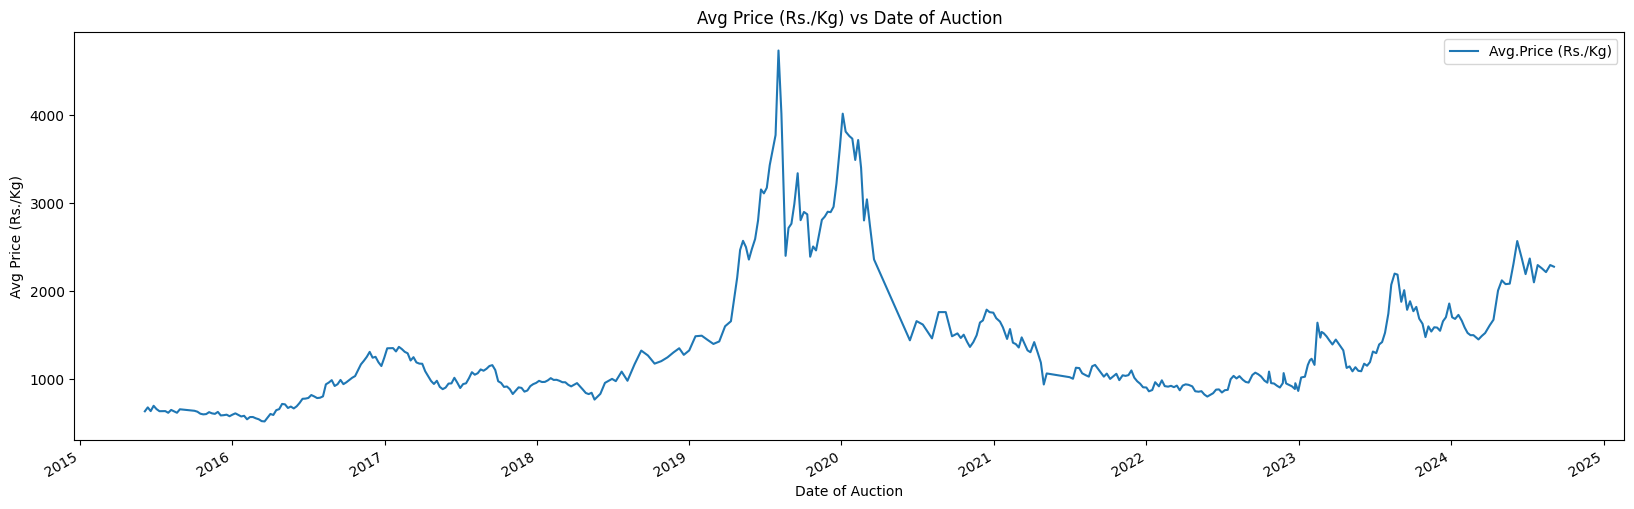

In [ ]:
from matplotlib import pyplot as plt
df_7[['Date of Auction','Avg.Price (Rs./Kg)']].plot(x='Date of Auction', y='Avg.Price (Rs./Kg)',figsize=(20, 6))  # Select columns using a list
plt.xlabel('Date of Auction')
plt.ylabel('Avg Price (Rs./Kg)')
plt.title('Avg Price (Rs./Kg) vs Date of Auction')
plt.show()

In [ ]:
mod_df_7 = df_7.iloc[1:135, :]
mod_df_7 = mod_df_7.reset_index(drop=True)
mod_df_7


,Date of Auction,Avg.Price (Rs./Kg)
0,2024-08-26,2295.66
1,2024-08-16,2215.19
2,2024-08-06,2258.08
3,2024-07-27,2295.39
4,2024-07-18,2099.05
...,...,...
129,2022-01-07,860.87
130,2022-01-01,904.15
131,2021-12-24,906.57
132,2021-12-17,947.16


In [ ]:
def adf_test(dataset):
   pvalue = sm.tsa.stattools.adfuller(dataset)[1]
   if pvalue <= 0.05:
      print('Sequence is stationary')
   else:
      print('Sequence is not stationary')

#adf_test(mobile_sales.Sales)

In [ ]:

import statsmodels.api as sm
de_trend = mod_df_7['Avg.Price (Rs./Kg)'].diff(1)
stationary = de_trend.diff()
#stationary.plot()
#de_trend.plot()
adf_test(stationary.dropna())

Sequence is stationary


In [ ]:
import numpy as np
np.corrcoef(mod_df_7['Avg.Price (Rs./Kg)'][1:],mod_df_7['Avg.Price (Rs./Kg)'].shift(1)[1:])[0][1]

0.9715839189302343

In [ ]:
lag = 2
np.corrcoef(mod_df_7['Avg.Price (Rs./Kg)'][lag:],mod_df_7['Avg.Price (Rs./Kg)'].shift(lag)[lag:])

array([[1.        , 0.94979344],
       [0.94979344, 1.        ]])

In [ ]:
lag = 3
np.corrcoef(mod_df_7['Avg.Price (Rs./Kg)'][lag:],mod_df_7['Avg.Price (Rs./Kg)'].shift(lag)[lag:])[0][1]

0.9181703965905306

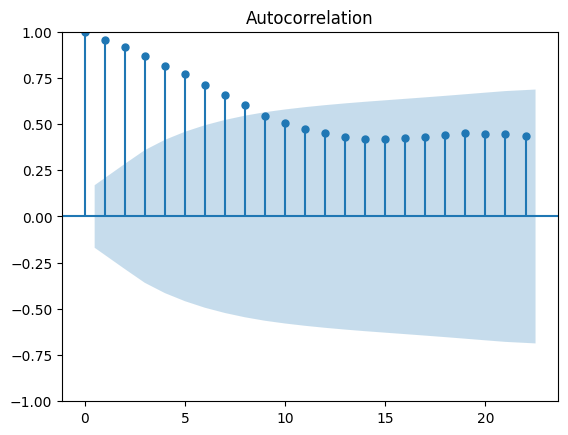

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(mod_df_7['Avg.Price (Rs./Kg)']);

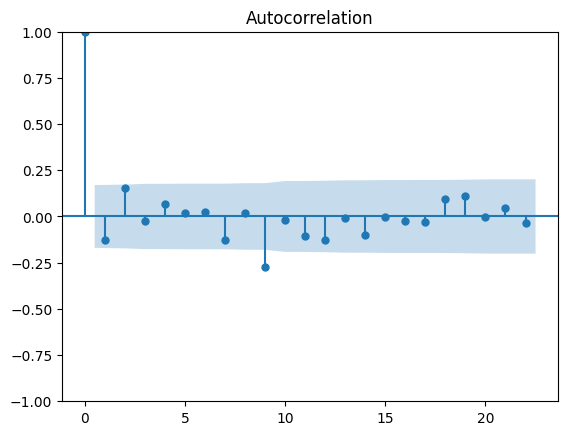

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(mod_df_7['Avg.Price (Rs./Kg)'].diff(1).dropna());

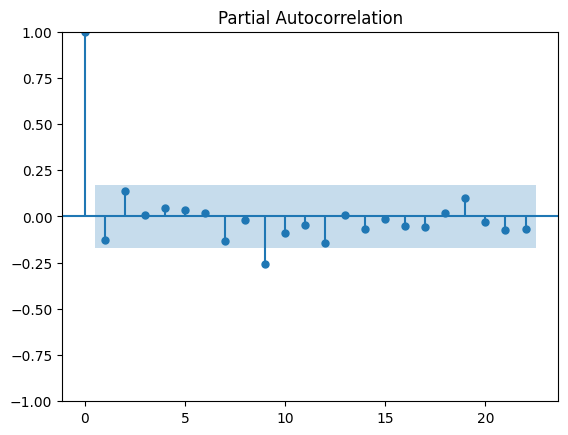

In [ ]:
plot_pacf
plot_pacf(mod_df_7['Avg.Price (Rs./Kg)'].diff(1).dropna());

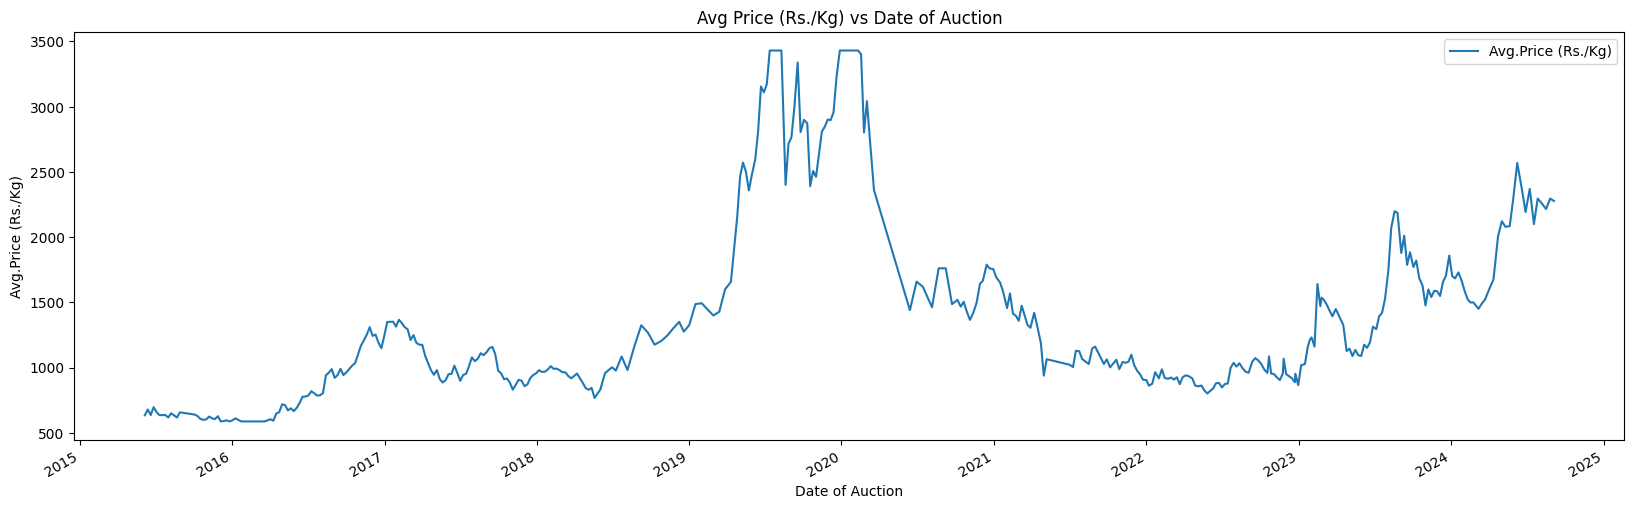

In [ ]:
from matplotlib import pyplot as plt
df_7[ 'Avg.Price (Rs./Kg)'] = df_7[ 'Avg.Price (Rs./Kg)'].clip(lower = df_7['Avg.Price (Rs./Kg)'].quantile(0.025),upper = df_7['Avg.Price (Rs./Kg)'].quantile(0.975))
df_7[['Date of Auction','Avg.Price (Rs./Kg)']].plot(x='Date of Auction', y='Avg.Price (Rs./Kg)',figsize=(20, 6))
#df_7[['Date of Auction','Avg.Price (Rs./Kg)']].plot(label="original")

plt.xlabel('Date of Auction')
plt.ylabel('Avg.Price (Rs./Kg)')
plt.title('Avg Price (Rs./Kg) vs Date of Auction')
#plt.rcParams['figure.figsize'] = (20, 4)
plt.legend()

[]

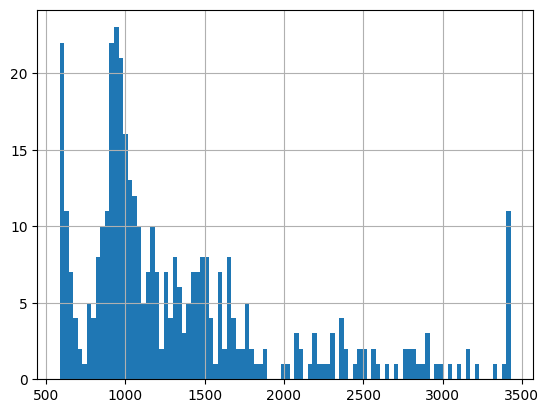

In [ ]:
df_7['Avg.Price (Rs./Kg)'].hist(bins=100).plot()

[]

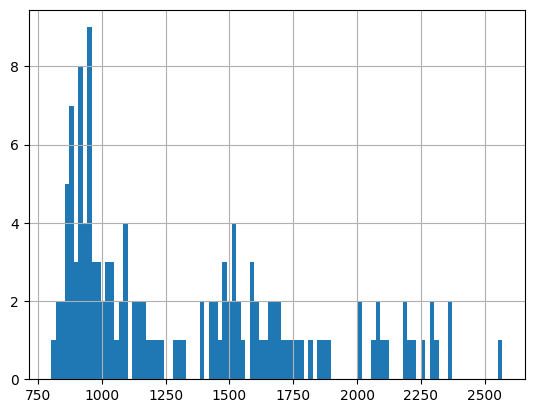

In [ ]:
mod_df_7['Avg.Price (Rs./Kg)'].hist(bins=100).plot()

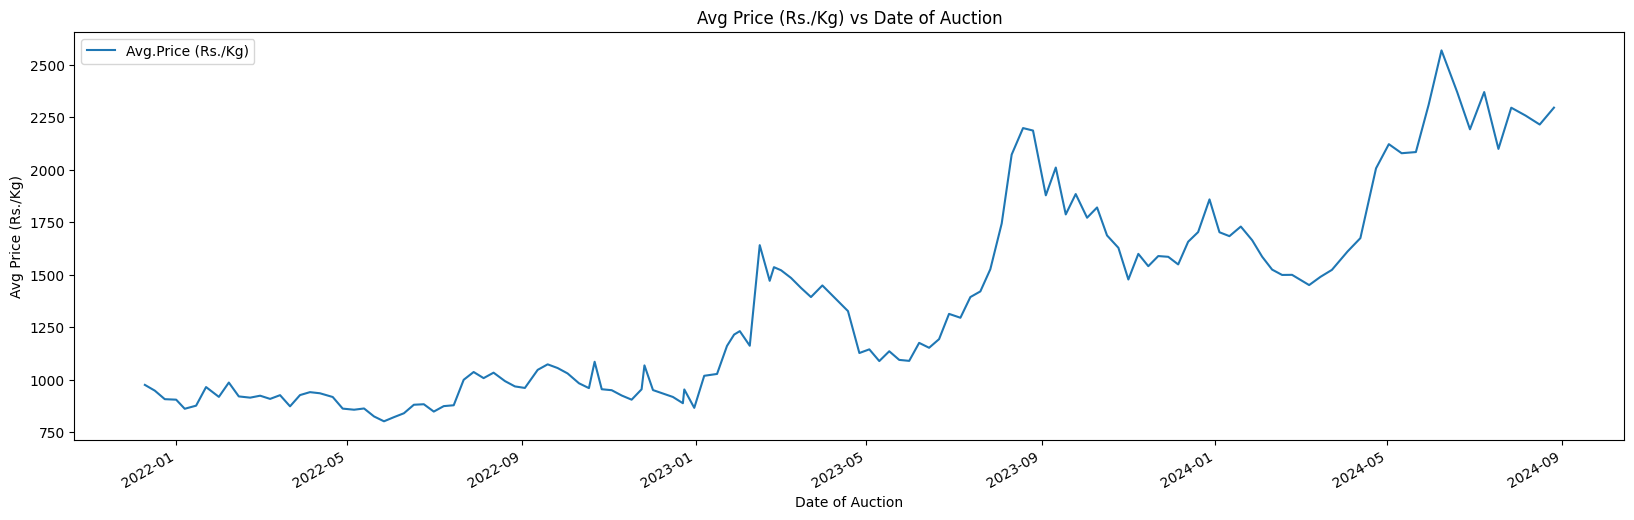

In [ ]:
mod_df_7[['Date of Auction','Avg.Price (Rs./Kg)']].plot(x='Date of Auction', y='Avg.Price (Rs./Kg)',figsize=(20, 6))  # Select columns using a list
plt.xlabel('Date of Auction')
plt.ylabel('Avg Price (Rs./Kg)')
plt.title('Avg Price (Rs./Kg) vs Date of Auction')
plt.show()

<Axes: xlabel='Date of Auction'>

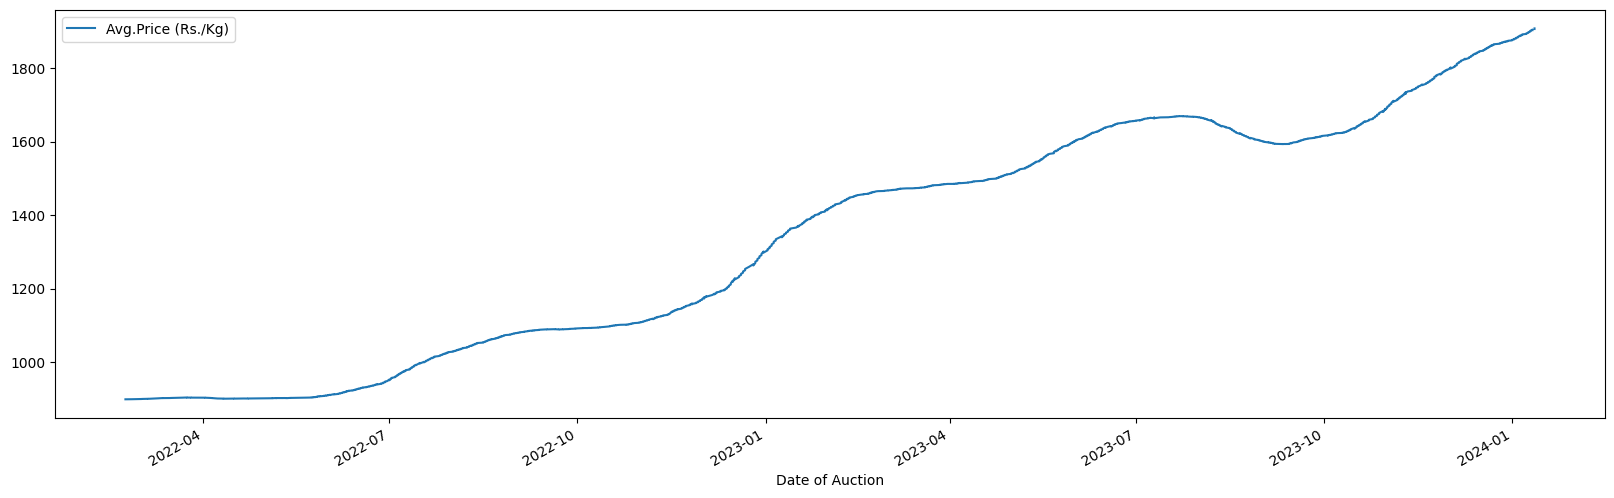

In [ ]:
mod_df_8 = df_4.iloc[1:1470, :].copy()
mod_df_8['Avg.Price (Rs./Kg)'] = mod_df_8['Avg.Price (Rs./Kg)'].rolling(window=365).mean()
#mod_df_8.head(20)
mod_df_8[['Date of Auction','Avg.Price (Rs./Kg)']].plot(x='Date of Auction', y='Avg.Price (Rs./Kg)',figsize=(20, 6))

In [ ]:
Cardamom_Planters_Association = df_3[df_3['Auctioneer']=="Cardamom Planters' Association, Santhanpara"]
Cardamom_Planters_Association
df_9 = Cardamom_Planters_Association[['Date of Auction','MaxPrice (Rs./Kg)']].copy()

#Cardamom_Planters_Association = df_3[df_3['Auctioneer']=="Cardamom Planters' Association, Santhanpara"]
#Cardamom_Planters_Association
#df_9 = Cardamom_Planters_Association[['Date of Auction','Avg.Price (Rs./Kg)']].copy()


#df_3['Auctioneer'] = df_3['Auctioneer'].astype(str)  # Replace 'column_name' with the actual column name

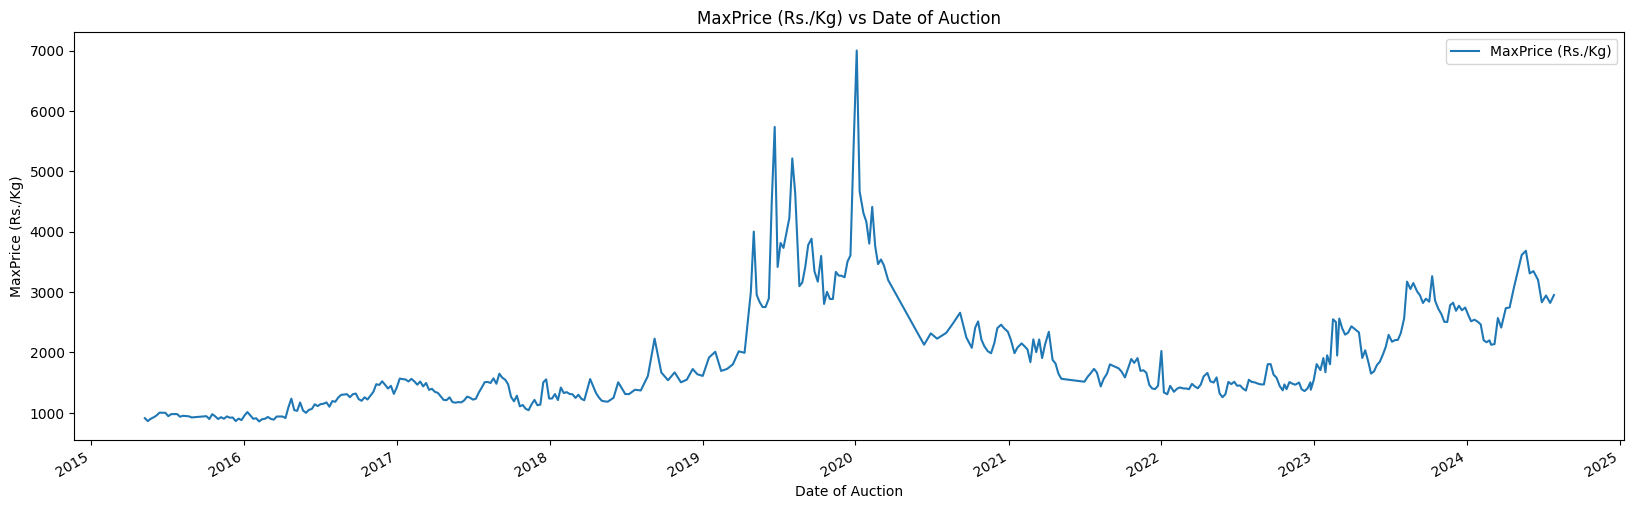

In [ ]:
from matplotlib import pyplot as plt
df_9[['Date of Auction','MaxPrice (Rs./Kg)']].plot(x='Date of Auction', y='MaxPrice (Rs./Kg)',figsize=(20, 6))  # Select columns using a list
plt.xlabel('Date of Auction')
plt.ylabel('MaxPrice (Rs./Kg)')
plt.title('MaxPrice (Rs./Kg) vs Date of Auction')
plt.show()

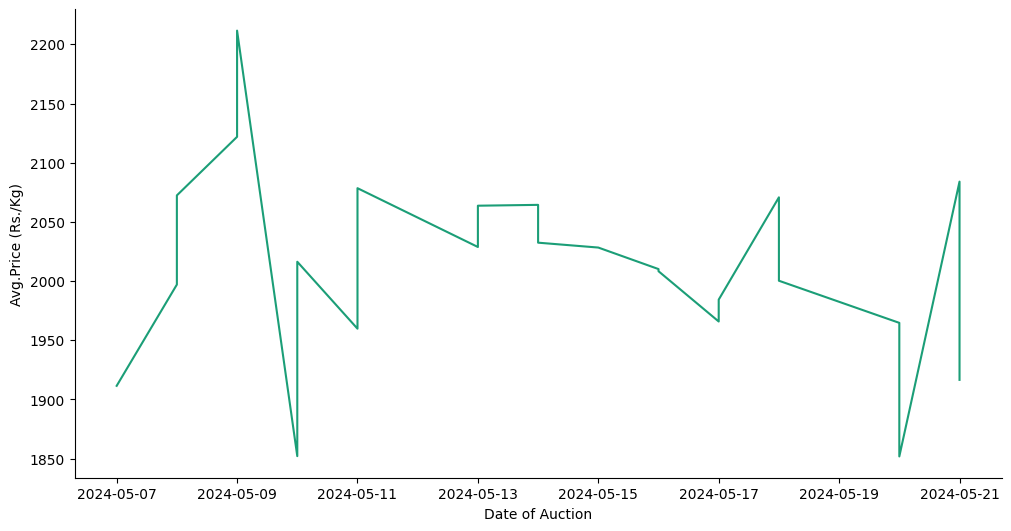

In [ ]:
# @title Date of Auction vs Avg.Price (Rs./Kg)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date of Auction']
  ys = series['Avg.Price (Rs./Kg)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_5.sort_values('Date of Auction', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date of Auction')
_ = plt.ylabel('Avg.Price (Rs./Kg)')

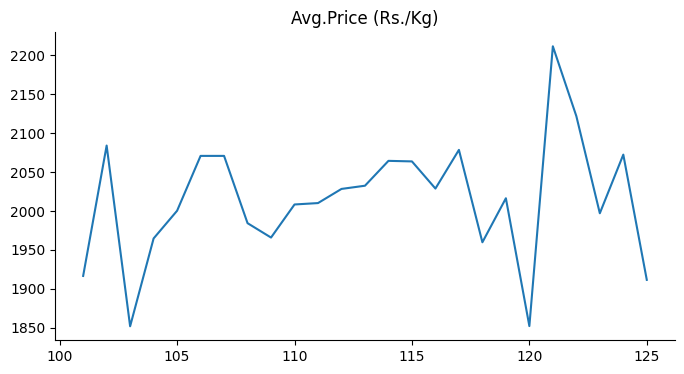

In [ ]:
# @title Avg.Price (Rs./Kg)

from matplotlib import pyplot as plt
df_5['Avg.Price (Rs./Kg)'].plot(kind='line', figsize=(8, 4), title='Avg.Price (Rs./Kg)')
plt.gca().spines[['top', 'right']].set_visible(False)